# World Happiness Report 2017
### Happiness Rank and Score by Countries

The World Happiness 2017 ranks 155 countries by their happiness levels. The happiness scores are based on six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity

Source Link: https://www.kaggle.com/unsdsn/world-happiness

### Content:
    1. Loading Packages
    2. Loading and Viewing Dataset
    3. Cleaning Dataset
    4. Exploratory Data Analysis
    5. Regression Lines and Regression Model Fit


### 1. Loading Packages

In [88]:
library(tidyverse)
library(dplyr)
library(ggplot2)

### 2. Loading and Viewing Dataset

In [90]:
setwd("D:/2018 Fall Baruch/CIS 3920 Data Mining")
getwd()

happiness <- read.csv("2017.csv")
head(happiness)

str(happiness)

[1] "D:/2018 Fall Baruch/CIS 3920 Data Mining"

Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182
Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804


'data.frame':	155 obs. of  12 variables:
 $ Country                      : Factor w/ 155 levels "Afghanistan",..: 105 38 58 133 45 99 26 100 132 7 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.54 7.52 7.5 7.49 7.47 ...
 $ Whisker.high                 : num  7.59 7.58 7.62 7.56 7.53 ...
 $ Whisker.low                  : num  7.48 7.46 7.39 7.43 7.41 ...
 $ Economy..GDP.per.Capita.     : num  1.62 1.48 1.48 1.56 1.44 ...
 $ Family                       : num  1.53 1.55 1.61 1.52 1.54 ...
 $ Health..Life.Expectancy.     : num  0.797 0.793 0.834 0.858 0.809 ...
 $ Freedom                      : num  0.635 0.626 0.627 0.62 0.618 ...
 $ Generosity                   : num  0.362 0.355 0.476 0.291 0.245 ...
 $ Trust..Government.Corruption.: num  0.316 0.401 0.154 0.367 0.383 ...
 $ Dystopia.Residual            : num  2.28 2.31 2.32 2.28 2.43 ...


### 3. Cleaning Data
 - Remove unnecessary columns Whisker.High and Whisker.Low
 - Rename column for readability and consistency
 - Add a column for continents (looking up online for the lists of countries in each continent)

In [91]:
happiness <- happiness[, -c(4,5)]

colnames(happiness) <- c("Country", "Happiness.Rank", "Happiness.Score", 
                         "Economy", "Family", "Life.Expectancy", "Freedom", 
                         "Generosity", "Trust", "Dystopia.Residual")
names(happiness)

[1] "Country"           "Happiness.Rank"    "Happiness.Score"  
 [4] "Economy"           "Family"            "Life.Expectancy"  
 [7] "Freedom"           "Generosity"        "Trust"            
[10] "Dystopia.Residual"

In [92]:
happiness$Continent <- NA

asia <- c("Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
          "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
          "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
          "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
          "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
          "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
          "Cambodia", "Afghanistan", "Yemen", "Syria")

europe <- c("Norway", "Denmark", "Iceland", "Switzerland", "Finland",
            "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
            "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
            "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
            "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
            "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
            "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
            "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
            "Bulgaria", "Albania", "Ukraine")

north.america <- c("Canada", "Costa Rica", "United States", "Mexico",  
                   "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                   "Jamaica", "Nicaragua", "Dominican Republic", "Honduras", "Haiti")

south.america <- c("Chile", "Brazil", "Argentina", "Uruguay", "Colombia", 
                   "Ecuador", "Bolivia", "Peru", "Paraguay", "Venezuela")

australia <- c("New Zealand", "Australia")

happiness$Continent[which(happiness$Country %in% asia)] <- "Asia"
happiness$Continent[which(happiness$Country %in% europe)] <- "Europe"
happiness$Continent[which(happiness$Country %in% north.america)] <- "North America"
happiness$Continent[which(happiness$Country %in% south.america)] <- "South America"
happiness$Continent[which(happiness$Country %in% australia)] <- "Australia"
happiness$Continent[which(is.na(happiness$Continent))] <- "Africa"

happiness <- happiness %>% select(Country, Continent, Happiness.Rank, Happiness.Score, 
                                  Economy, Family, Life.Expectancy, Freedom, 
                                  Generosity, Trust, Dystopia.Residual) 

happiness$Continent <- as.factor(happiness$Continent)

In [93]:
str(happiness)

'data.frame':	155 obs. of  11 variables:
 $ Country          : Factor w/ 155 levels "Afghanistan",..: 105 38 58 133 45 99 26 100 132 7 ...
 $ Continent        : Factor w/ 6 levels "Africa","Asia",..: 4 4 4 4 4 4 5 3 4 3 ...
 $ Happiness.Rank   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score  : num  7.54 7.52 7.5 7.49 7.47 ...
 $ Economy          : num  1.62 1.48 1.48 1.56 1.44 ...
 $ Family           : num  1.53 1.55 1.61 1.52 1.54 ...
 $ Life.Expectancy  : num  0.797 0.793 0.834 0.858 0.809 ...
 $ Freedom          : num  0.635 0.626 0.627 0.62 0.618 ...
 $ Generosity       : num  0.362 0.355 0.476 0.291 0.245 ...
 $ Trust            : num  0.316 0.401 0.154 0.367 0.383 ...
 $ Dystopia.Residual: num  2.28 2.31 2.32 2.28 2.43 ...


### 4. Exporatory Data Analysis
 - View the cleaned data and separate country names from the variables
 - Produce a numerical summary of the variables
 - Produce a scatterplot matrix of the variables
 - Side-by-side boxplot and histogram for the happiness score accross continents
 - Create new qualitative variable and produce side-by-side boxplots for comparision
 - Use histograms for some quantitative variables

In [94]:
#View the cleaned data
head(happiness, n = 5)

Country,Continent,Happiness.Rank,Happiness.Score,Economy,Family,Life.Expectancy,Freedom,Generosity,Trust,Dystopia.Residual
Norway,Europe,1,7.537,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
Denmark,Europe,2,7.522,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
Iceland,Europe,3,7.504,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
Switzerland,Europe,4,7.494,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
Finland,Europe,5,7.469,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182


In [95]:
#Separate country names from the variables
rownames <- happiness[, 1]
happiness <- happiness[, -1]
head(happiness, n = 5)

Continent,Happiness.Rank,Happiness.Score,Economy,Family,Life.Expectancy,Freedom,Generosity,Trust,Dystopia.Residual
Europe,1,7.537,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
Europe,2,7.522,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
Europe,3,7.504,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
Europe,4,7.494,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
Europe,5,7.469,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182


In [96]:
#Numerical Summary
summary(happiness)

         Continent  Happiness.Rank  Happiness.Score    Economy      
 Africa       :44   Min.   :  1.0   Min.   :2.693   Min.   :0.0000  
 Asia         :43   1st Qu.: 39.5   1st Qu.:4.505   1st Qu.:0.6634  
 Australia    : 2   Median : 78.0   Median :5.279   Median :1.0646  
 Europe       :42   Mean   : 78.0   Mean   :5.354   Mean   :0.9847  
 North America:14   3rd Qu.:116.5   3rd Qu.:6.101   3rd Qu.:1.3180  
 South America:10   Max.   :155.0   Max.   :7.537   Max.   :1.8708  
     Family      Life.Expectancy     Freedom         Generosity    
 Min.   :0.000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.043   1st Qu.:0.3699   1st Qu.:0.3037   1st Qu.:0.1541  
 Median :1.254   Median :0.6060   Median :0.4375   Median :0.2315  
 Mean   :1.189   Mean   :0.5513   Mean   :0.4088   Mean   :0.2469  
 3rd Qu.:1.414   3rd Qu.:0.7230   3rd Qu.:0.5166   3rd Qu.:0.3238  
 Max.   :1.611   Max.   :0.9495   Max.   :0.6582   Max.   :0.8381  
     Trust         Dystopia.Residual
 Min

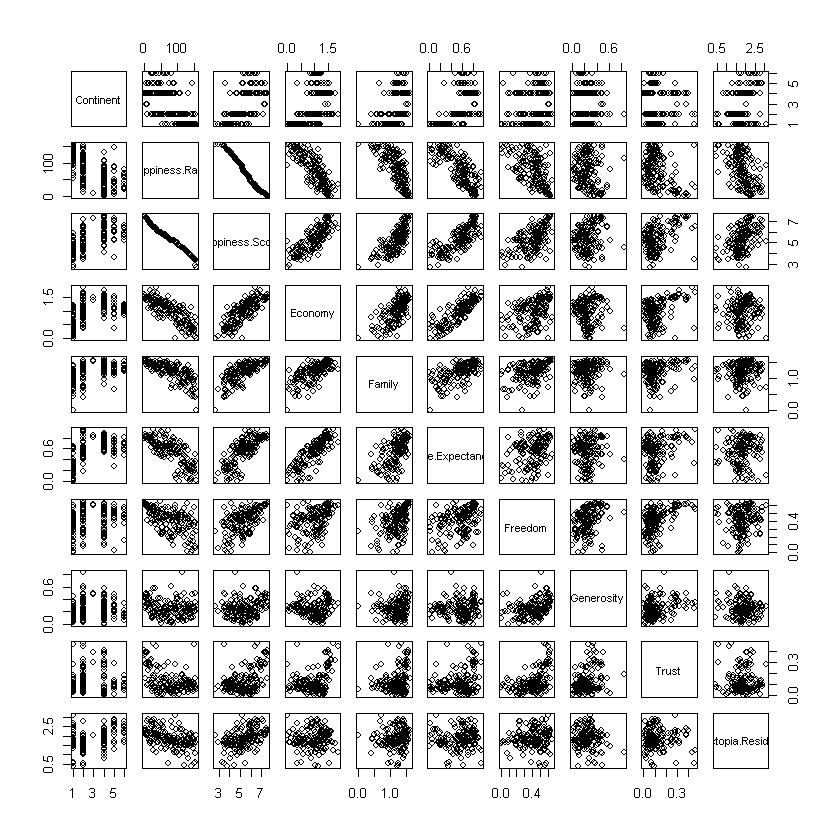

In [97]:
#Scatterplot Matrix
pairs(happiness[, 1:10])

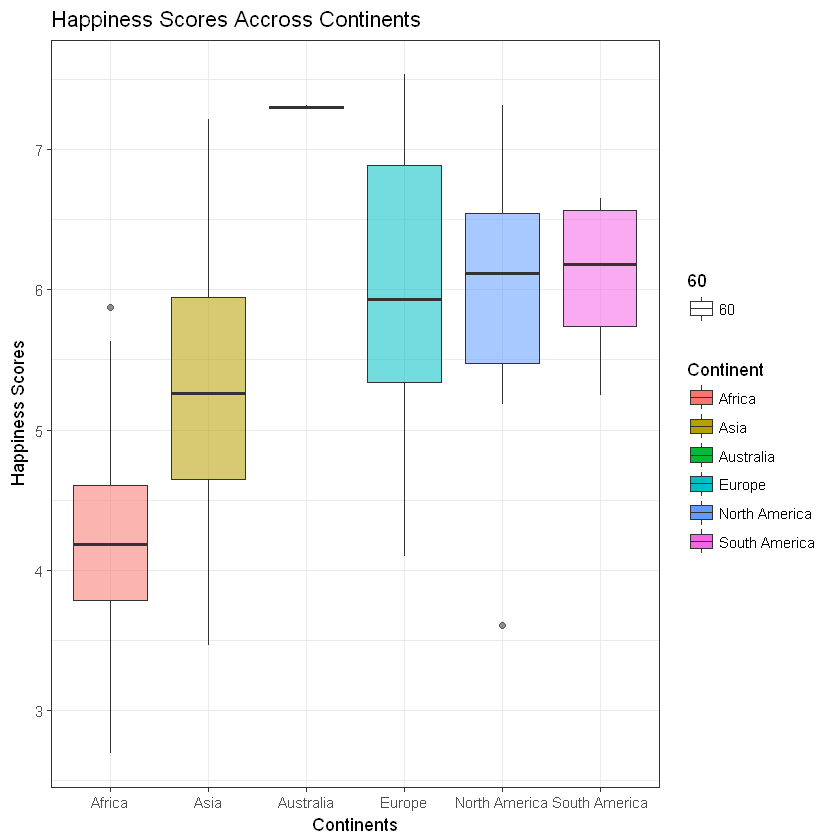

In [119]:
#Side-by-side Boxplot
ggplot(happiness, aes(x = Continent, y = Happiness.Score, fill = Continent, alpha = 60)) +
       geom_boxplot() + ggtitle("Happiness Scores Accross Continents") +
       xlab("Continents") + ylab("Happiness Scores") + theme_bw()

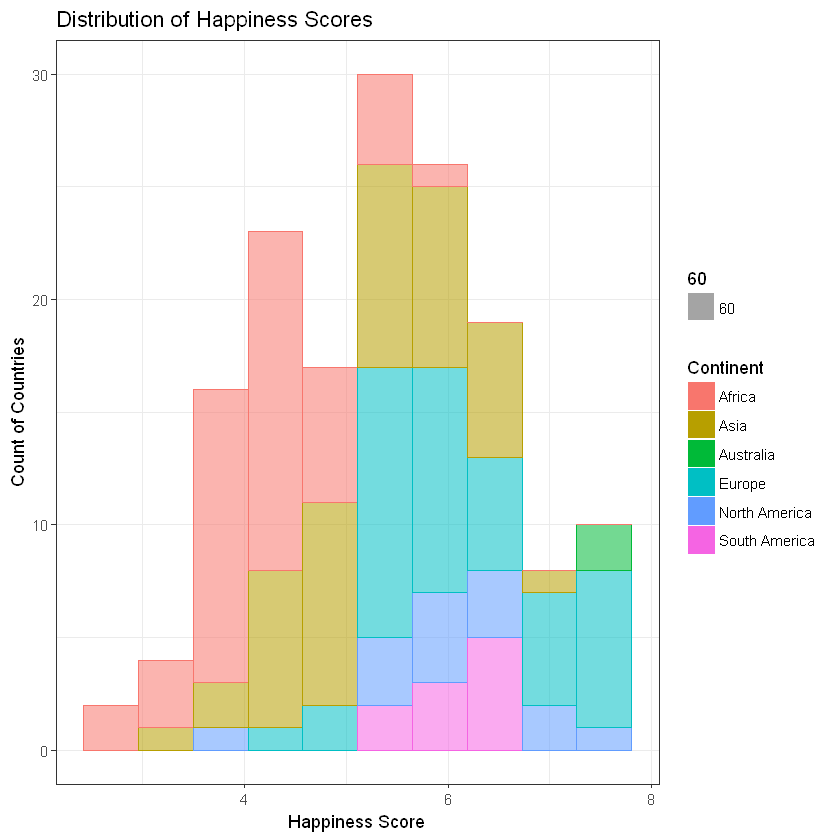

In [118]:
#Happiness Score Histogram
ggplot(happiness, aes(Happiness.Score, fill = Continent, color = Continent)) + 
       geom_histogram(aes(alpha = 60), bins = 10) +
       ggtitle("Distribution of Happiness Scores") +
       xlab("Happiness Score") + ylab("Count of Countries") + theme_bw()

In [79]:
#Create qualitative variable
Status <- rep("Neutral", nrow(happiness))
Status[happiness$Happiness.Rank <= 25] <- "Utopia"
Status[happiness$Happiness.Rank > 130] <- "Distopia"
Status <- as.factor(Status)

happiness$Status <- Status
summary(happiness$Status)

Distopia  Neutral   Utopia 
      25      105       25

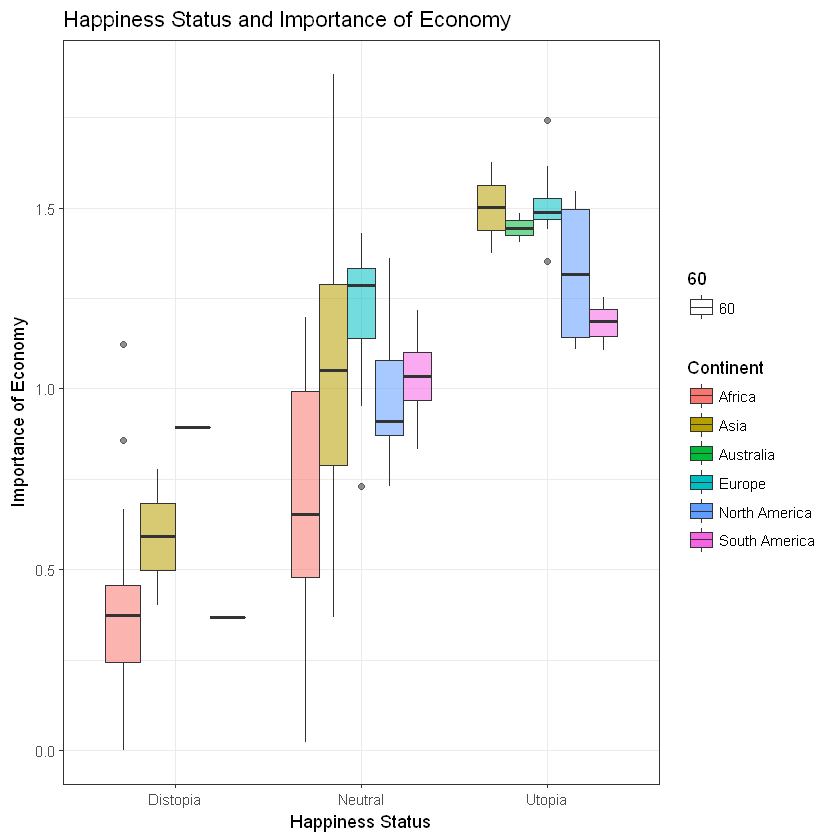

In [121]:
#Boxplot for Happiness Status
ggplot(happiness, aes(x = Status, y = Economy, fill = Continent)) +
       geom_boxplot(aes(alpha = 60)) + theme_bw() +
       xlab("Happiness Status") + ylab("Importance of Economy") +
       ggtitle("Happiness Status and Importance of Economy")

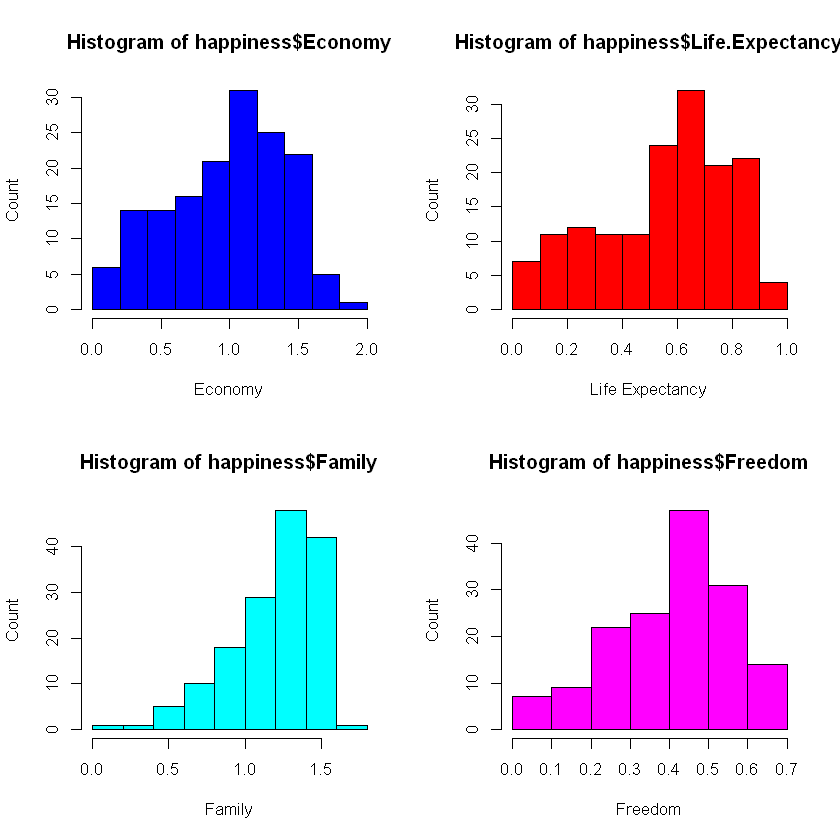

In [116]:
#Histogram for variables
par(mfrow = c(2,2))
hist(happiness$Economy, col = 4, xlab = "Economy", ylab = "Count")
hist(happiness$Life.Expectancy, col = 10, xlab = "Life Expectancy", ylab = "Count")
hist(happiness$Family, col = 5, xlab = "Family", ylab = "Count")
hist(happiness$Freedom, col = 6, xlab = "Freedom", ylab = "Count")

### 5. Regression Lines and Regression Model Fit 

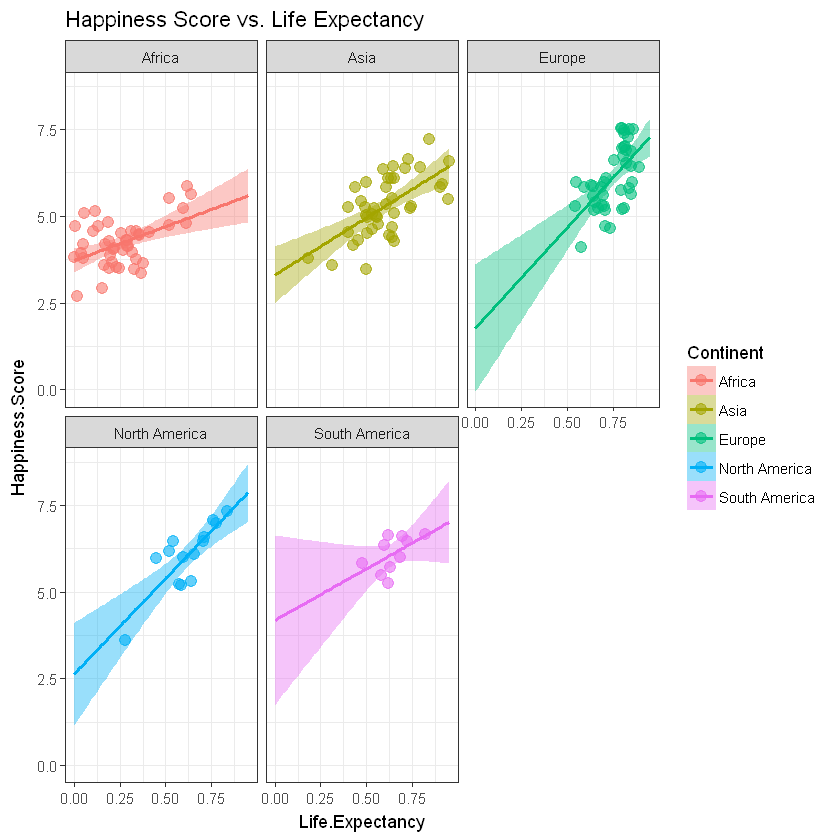

In [123]:
ggplot(subset(happiness, happiness$Continent != "Australia"), aes(x = Life.Expectancy, y = Happiness.Score)) + 
       geom_point(aes(color=Continent), size = 3, alpha = 0.6) +  
       geom_smooth(aes(color = Continent, fill = Continent), 
                   method = "lm", fullrange = TRUE) +
       facet_wrap(~Continent) +
       theme_bw() + labs(title = "Happiness Score vs. Life Expectancy")

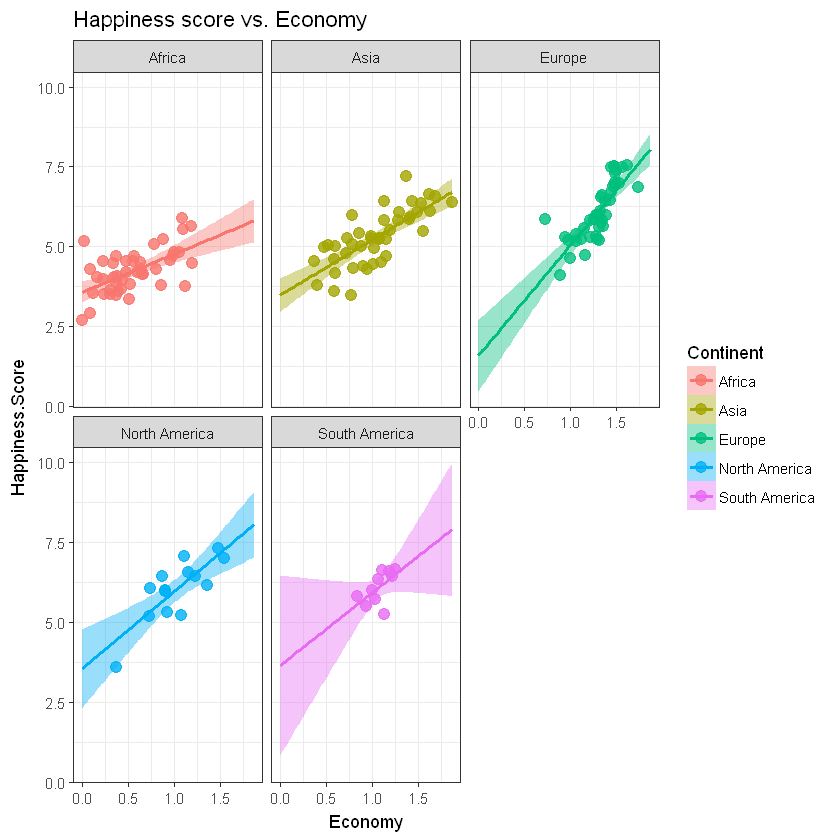

In [124]:
ggplot(subset(happiness, happiness$Continent != "Australia"), aes(x = Economy, y = Happiness.Score)) + 
       geom_point(aes(color=Continent), size = 3, alpha = 0.8) +  
       geom_smooth(aes(color = Continent, fill = Continent), 
                   method = "lm", fullrange = TRUE) +
       facet_wrap(~Continent) +
       theme_bw() + labs(title = "Happiness score vs. Economy")